## 주어진 데이터셋의 특징을 확인해보는 코드입니다

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from collections import Counter

from konlpy.tag import Okt

from functools import reduce
from wordcloud import WordCloud

#### konlpy랑 JPype1, wordcloud는 별도 설치가 필요한 라이브러리입니다.
konlpy는 한글 텍스트 데이터를 다루기 위해 필수적이라, 꼭 설치하시는 편이 좋겠습니다.

In [2]:
DATA_IN_PATH = './data_in/'

현재 폴더 하부의, data_in 폴더를 텍스트 데이터 가져올 디렉토리로 지정해둡니다.

In [3]:
data = pd.read_csv(DATA_IN_PATH + 'ChatbotData.csv', encoding='utf-8')

In [4]:
print(data.head()) # 대화 데이터 중 일부를 확인, 맨 앞 5 라인이 헤드, 나머지는 그냥 따라나온 것 아닌가 싶습니다.

                 Q            A  label
0           12시 땡!   하루가 또 가네요.      0
1      1지망 학교 떨어졌어    위로해 드립니다.      0
2     3박4일 놀러가고 싶다  여행은 언제나 좋죠.      0
3  3박4일 정도 놀러가고 싶다  여행은 언제나 좋죠.      0
4          PPL 심하네   눈살이 찌푸려지죠.      0


In [16]:
print(data[:20]) # 좀 더 많은 데이터를 확인해보겠습니다.

                          Q                    A  label
0                    12시 땡!           하루가 또 가네요.      0
1               1지망 학교 떨어졌어            위로해 드립니다.      0
2              3박4일 놀러가고 싶다          여행은 언제나 좋죠.      0
3           3박4일 정도 놀러가고 싶다          여행은 언제나 좋죠.      0
4                   PPL 심하네           눈살이 찌푸려지죠.      0
5                 SD카드 망가졌어   다시 새로 사는 게 마음 편해요.      0
6                   SD카드 안돼   다시 새로 사는 게 마음 편해요.      0
7            SNS 맞팔 왜 안하지ㅠㅠ     잘 모르고 있을 수도 있어요.      0
8   SNS 시간낭비인 거 아는데 매일 하는 중        시간을 정하고 해보세요.      0
9         SNS 시간낭비인데 자꾸 보게됨        시간을 정하고 해보세요.      0
10      SNS보면 나만 빼고 다 행복해보여          자랑하는 자리니까요.      0
11                   가끔 궁금해        그 사람도 그럴 거예요.      0
12              가끔 뭐하는지 궁금해        그 사람도 그럴 거예요.      0
13              가끔은 혼자인게 좋다            혼자를 즐기세요.      0
14                가난한 자의 설움       돈은 다시 들어올 거예요.      0
15               가만 있어도 땀난다            땀을 식혀주세요.      0
16               가상화폐 쫄딱 망함       어서 잊고 새출발 하세요.

In [5]:
sentences = list(data['Q']) + list(data['A']) # Q -> A를 한 덩어리로 만들어서 Q,A 구분 없이 텍스트 전반의 특징 확인해보기

In [18]:
print(sentences[:10])

['12시 땡!', '1지망 학교 떨어졌어', '3박4일 놀러가고 싶다', '3박4일 정도 놀러가고 싶다', 'PPL 심하네', 'SD카드 망가졌어', 'SD카드 안돼', 'SNS 맞팔 왜 안하지ㅠㅠ', 'SNS 시간낭비인 거 아는데 매일 하는 중', 'SNS 시간낭비인데 자꾸 보게됨']


In [6]:
tokenized_sentences = [s.split() for s in sentences] # 단어별 스플릿으로 토크나이징
sent_len_by_token = [len(t) for t in tokenized_sentences] # 각 단어 길이 확보
sent_len_by_eumjeol = [len(s.replace(' ', '')) for s in sentences] # 각 문장 내의 스페이스를 전부 공백으로 -> 문장 전체의 음절 수 확인

okt = Okt() # 형태소 분석기 사용 위해 객체 생성

morph_tokenized_sentences = [okt.morphs(s.replace(' ', '')) for s in sentences] # 각 문장 내 단어들을 형태소 분석기에 넣은 결과물 수집.
sent_len_by_morph = [len(t) for t in morph_tokenized_sentences] # 분석된 형태소들의 길이 측정

C:\Users\goldh\Anaconda3\lib\site-packages\jpype\_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


## 히스토그램 시각화

Text(0, 0.5, 'Number of Sentences')

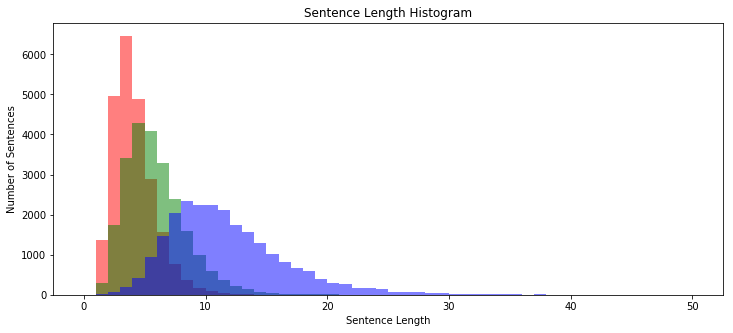

In [7]:
plt.figure(figsize=(12, 5))
plt.hist(sent_len_by_token, bins=50, range=[0,50], alpha=0.5, color= 'r', label='eojeol') # 단어(어절)들 길이 표시
plt.hist(sent_len_by_morph, bins=50, range=[0,50], alpha=0.5, color='g', label='morph') # 형태소들 길이 표시
plt.hist(sent_len_by_eumjeol, bins=50, range=[0,50], alpha=0.5, color='b', label='eumjeol') # 음절 길이 표시
# 플로팅은 총 50개의 막대 그래프를 0-50 사이에 배치해서 그리는 걸로 설정!
plt.title('Sentence Length Histogram')
plt.xlabel('Sentence Length')
plt.ylabel('Number of Sentences')

Text(0, 0.5, 'Number of Sentences')

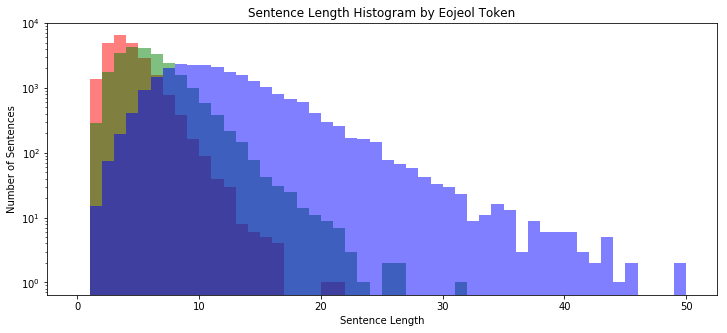

In [8]:
# 기본적으로 같은데, plt.yscale('log') 통해서 y축 값에 로그를 쳤음. 크기 차이가 심한 데이터를 함께 다루기 위한 방안임.
plt.figure(figsize=(12, 5))
plt.hist(sent_len_by_token, bins=50, range=[0,50], alpha=0.5, color= 'r', label='eojeol')
plt.hist(sent_len_by_morph, bins=50, range=[0,50], alpha=0.5, color='g', label='morph')
plt.hist(sent_len_by_eumjeol, bins=50, range=[0,50], alpha=0.5, color='b', label='eumjeol')
plt.yscale('log')
plt.title('Sentence Length Histogram by Eojeol Token')
plt.xlabel('Sentence Length')
plt.ylabel('Number of Sentences')

## 데이터 특성 파악

In [9]:
print('어절 최대길이: {}'.format(np.max(sent_len_by_token)))
print('어절 최소길이: {}'.format(np.min(sent_len_by_token)))
print('어절 평균길이: {:.2f}'.format(np.mean(sent_len_by_token)))
print('어절 길이 표준편차: {:.2f}'.format(np.std(sent_len_by_token)))
print('어절 중간길이: {}'.format(np.median(sent_len_by_token)))
print('제 1 사분위 길이: {}'.format(np.percentile(sent_len_by_token, 25)))
print('제 3 사분위 길이: {}'.format(np.percentile(sent_len_by_token, 75)))

어절 최대길이: 21
어절 최소길이: 1
어절 평균길이: 3.64
어절 길이 표준편차: 1.74
어절 중간길이: 3.0
제 1 사분위 길이: 2.0
제 3 사분위 길이: 5.0


In [10]:
print('형태소 최대길이: {}'.format(np.max(sent_len_by_morph)))
print('형태소 최소길이: {}'.format(np.min(sent_len_by_morph)))
print('형태소 평균길이: {:.2f}'.format(np.mean(sent_len_by_morph)))
print('형태소 길이 표준편차: {:.2f}'.format(np.std(sent_len_by_morph)))
print('형태소 중간길이: {}'.format(np.median(sent_len_by_morph)))
print('형태소 1/4 퍼센타일 길이: {}'.format(np.percentile(sent_len_by_morph, 25)))
print('형태소 3/4 퍼센타일 길이: {}'.format(np.percentile(sent_len_by_morph, 75)))

형태소 최대길이: 31
형태소 최소길이: 1
형태소 평균길이: 5.41
형태소 길이 표준편차: 2.56
형태소 중간길이: 5.0
형태소 1/4 퍼센타일 길이: 4.0
형태소 3/4 퍼센타일 길이: 7.0


In [11]:
print('음절 최대길이: {}'.format(np.max(sent_len_by_eumjeol)))
print('음절 최소길이: {}'.format(np.min(sent_len_by_eumjeol)))
print('음절 평균길이: {:.2f}'.format(np.mean(sent_len_by_eumjeol)))
print('음절 길이 표준편차: {:.2f}'.format(np.std(sent_len_by_eumjeol)))
print('음절 중간길이: {}'.format(np.median(sent_len_by_eumjeol)))
print('음절 1/4 퍼센타일 길이: {}'.format(np.percentile(sent_len_by_eumjeol, 25)))
print('음절 3/4 퍼센타일 길이: {}'.format(np.percentile(sent_len_by_eumjeol, 75)))

음절 최대길이: 57
음절 최소길이: 1
음절 평균길이: 11.31
음절 길이 표준편차: 4.98
음절 중간길이: 10.0
음절 1/4 퍼센타일 길이: 8.0
음절 3/4 퍼센타일 길이: 14.0


## 박스 플롯으로 특성들 한 눈에 돌아보기

이런 식으로 플롯팅한거니까 참조!

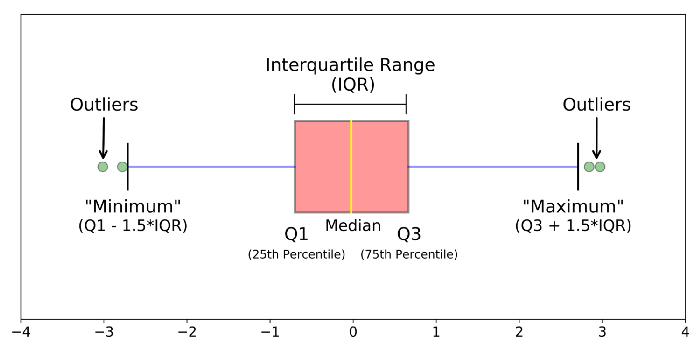

{'whiskers': [<matplotlib.lines.Line2D at 0x15fb14cfcf8>,
 'caps': [<matplotlib.lines.Line2D at 0x15fb14ca3c8>,
 'boxes': [<matplotlib.lines.Line2D at 0x15fb14cf908>,
 'medians': [<matplotlib.lines.Line2D at 0x15fb14caa58>,
 'fliers': [<matplotlib.lines.Line2D at 0x15fb14cae10>,
 'means': [<matplotlib.lines.Line2D at 0x15fb14cada0>,
  <matplotlib.lines.Line2D at 0x15fb1514358>]}

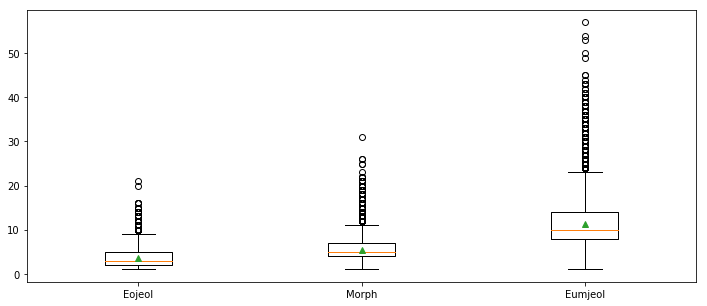

In [12]:
plt.figure(figsize=(12, 5))
plt.boxplot([sent_len_by_token, sent_len_by_morph, sent_len_by_eumjeol],
            labels=['Eojeol', 'Morph', 'Eumjeol'], 
            showmeans=True)

음절의 경우가 Variance가 가장 크게 나타났음!

## Q/A를 구분해서 특성 파악

In [19]:
# 토크나이징
query_sentences = list(data['Q'])
answer_sentences = list(data['A'])

query_morph_tokenized_sentences = [okt.morphs(s.replace(' ', '')) for s in query_sentences]
query_sent_len_by_morph = [len(t) for t in query_morph_tokenized_sentences]

answer_morph_tokenized_sentences = [okt.morphs(s.replace(' ', '')) for s in answer_sentences]
answer_sent_len_by_morph = [len(t) for t in answer_morph_tokenized_sentences]

Text(0, 0.5, 'Number of Queries')

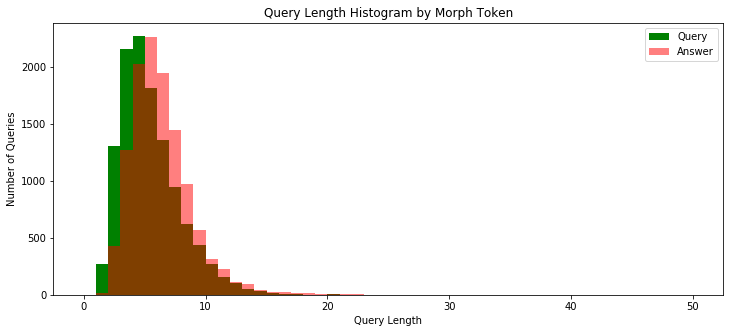

In [20]:
# 질문/응답 각각의 형태소 길이 
plt.figure(figsize=(12, 5))
plt.hist(query_sent_len_by_morph, bins=50, range=[0,50], color='g', label='Query')
plt.hist(answer_sent_len_by_morph, bins=50, range=[0,50], color='r', alpha=0.5, label='Answer')
plt.legend()
plt.title('Query Length Histogram by Morph Token')
plt.xlabel('Query Length')
plt.ylabel('Number of Queries')

Text(0, 0.5, 'Number of Queries')

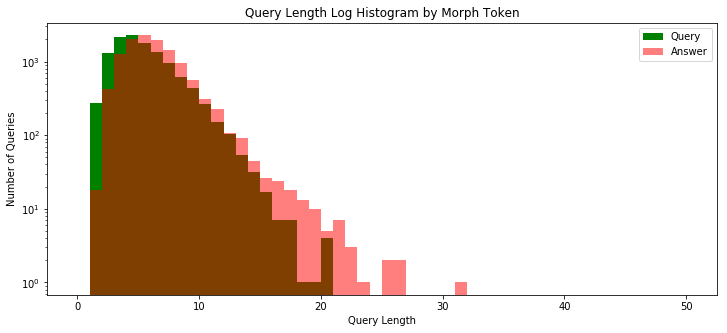

In [27]:
# 마찬가지로 로그 적용 시
plt.figure(figsize=(12, 5))
plt.hist(query_sent_len_by_morph, bins=50, range=[0,50], color='g', label='Query')
plt.hist(answer_sent_len_by_morph, bins=50, range=[0,50], color='r', alpha=0.5, label='Answer')
plt.legend()
plt.yscale('log', nonposy='clip')
plt.title('Query Length Log Histogram by Morph Token')
plt.xlabel('Query Length')
plt.ylabel('Number of Queries')

In [22]:
print('형태소 최대길이: {}'.format(np.max(query_sent_len_by_morph)))
print('형태소 최소길이: {}'.format(np.min(query_sent_len_by_morph)))
print('형태소 평균길이: {:.2f}'.format(np.mean(query_sent_len_by_morph)))
print('형태소 길이 표준편차: {:.2f}'.format(np.std(query_sent_len_by_morph)))
print('형태소 중간길이: {}'.format(np.median(query_sent_len_by_morph)))
print('형태소 1/4 퍼센타일 길이: {}'.format(np.percentile(query_sent_len_by_morph, 25)))
print('형태소 3/4 퍼센타일 길이: {}'.format(np.percentile(query_sent_len_by_morph, 75)))

형태소 최대길이: 20
형태소 최소길이: 1
형태소 평균길이: 4.95
형태소 길이 표준편차: 2.48
형태소 중간길이: 4.0
형태소 1/4 퍼센타일 길이: 3.0
형태소 3/4 퍼센타일 길이: 6.0


In [23]:
print('형태소 최대길이: {}'.format(np.max(answer_sent_len_by_morph)))
print('형태소 최소길이: {}'.format(np.min(answer_sent_len_by_morph)))
print('형태소 평균길이: {:.2f}'.format(np.mean(answer_sent_len_by_morph)))
print('형태소 길이 표준편차: {:.2f}'.format(np.std(answer_sent_len_by_morph)))
print('형태소 중간길이: {}'.format(np.median(answer_sent_len_by_morph)))
print('형태소 1/4 퍼센타일 길이: {}'.format(np.percentile(answer_sent_len_by_morph, 25)))
print('형태소 3/4 퍼센타일 길이: {}'.format(np.percentile(answer_sent_len_by_morph, 75)))

형태소 최대길이: 31
형태소 최소길이: 1
형태소 평균길이: 5.87
형태소 길이 표준편차: 2.55
형태소 중간길이: 5.0
형태소 1/4 퍼센타일 길이: 4.0
형태소 3/4 퍼센타일 길이: 7.0


In [24]:
okt.pos('오늘밤은유난히덥구나')

[('오늘밤', 'Noun'), ('은', 'Josa'), ('유난히', 'Adverb'), ('덥구나', 'Adjective')]

## 워드클라우드 만들어보기

In [25]:
# 우선 리스트 객체만 만들어두고 시작.
query_NVA_token_sentences = list()
answer_NVA_token_sentences = list()

for s in query_sentences:
    for token, tag in okt.pos(s.replace(' ', '')):
        if tag == 'Noun' or tag == 'Verb' or tag == 'Adjective':
            query_NVA_token_sentences.append(token)

for s in answer_sentences:
    temp_token_bucket = list()
    for token, tag in okt.pos(s.replace(' ', '')):
        if tag == 'Noun' or tag == 'Verb' or tag == 'Adjective':
            answer_NVA_token_sentences.append(token)
            
query_NVA_token_sentences = ' '.join(query_NVA_token_sentences)
answer_NVA_token_sentences = ' '.join(answer_NVA_token_sentences)

#### 질문 워드클라우드

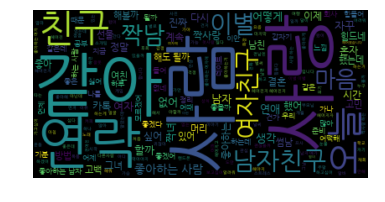

In [28]:
query_wordcloud = WordCloud(font_path= DATA_IN_PATH + 'NanumGothic.ttf').generate(query_NVA_token_sentences)

plt.imshow(query_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#### 대답 워드클라우드

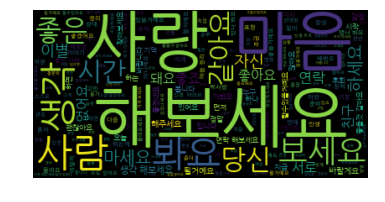

In [29]:
query_wordcloud = WordCloud(font_path= DATA_IN_PATH + 'NanumGothic.ttf').generate(answer_NVA_token_sentences)

plt.imshow(query_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()